# 概述

为什么会有基于推荐系统的矩阵分解?

在推荐系统中有一类问题是对未打分的商品进行评分的预测。

# 基于矩阵分解的推荐算法

## 矩阵分解的一般形式

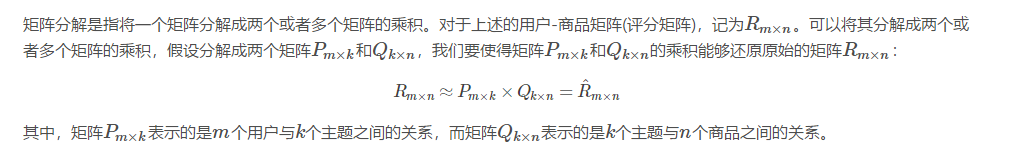

## 利用矩阵分解进行预测

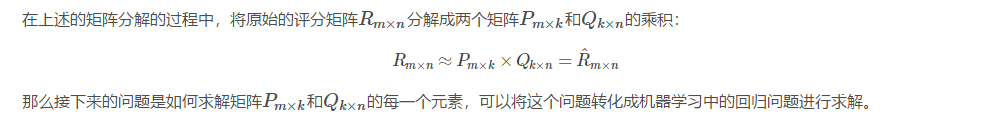

### 损失函数

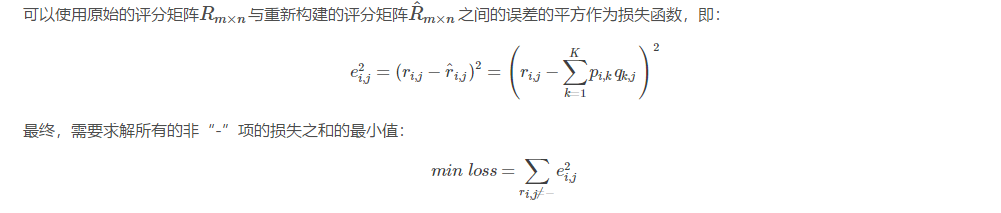

### 损失函数的求解

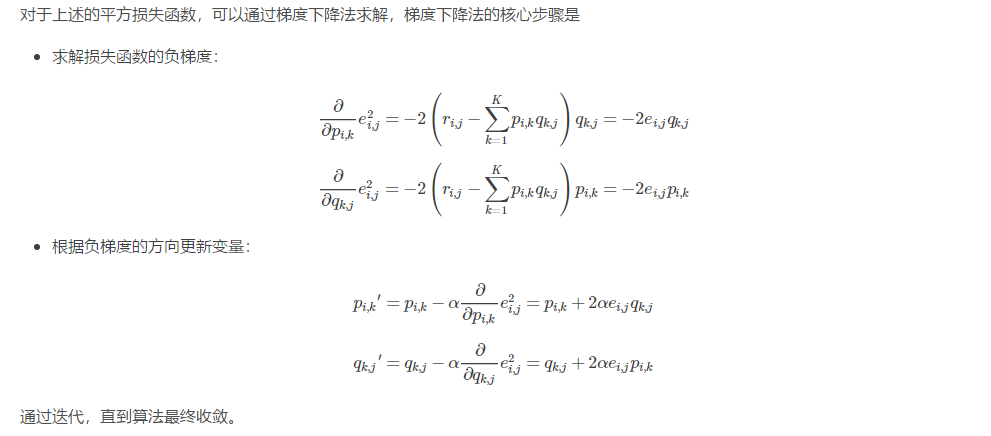

### 加入正则项的损失函数即求解方法

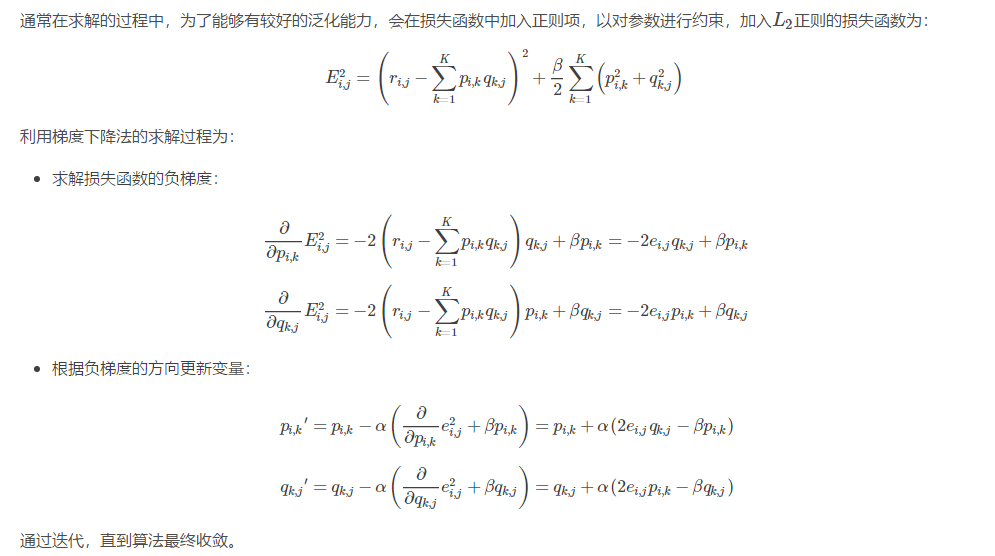

### 预测

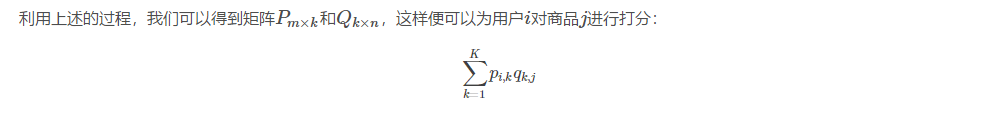

# 代码实现

In [10]:
import numpy as np

def gradAscent(data, K):
    dataMat = mat(data)
    print(dataMat)
    m, n = shape(dataMat)
    p = mat(random.random((m, K)))
    q = mat(random.random((K, n)))

    alpha = 0.0002
    beta = 0.02
    maxCycles = 10000

    for step in range(maxCycles):
        for i in range(m):
            for j in range(n):
                if dataMat[i,j] > 0:
                    error = dataMat[i,j]
                    for k in range(K):
                        error = error - p[i,k]*q[k,j]
                    for k in range(K):
                        p[i,k] = p[i,k] + alpha * (2 * error * q[k,j] - beta * p[i,k])
                        q[k,j] = q[k,j] + alpha * (2 * error * p[i,k] - beta * q[k,j])

        loss = 0.0
        for i in range(m):
            for j in range(n):
                if dataMat[i,j] > 0:
                    error = 0.0
                    for k in range(K):
                        error = error + p[i,k]*q[k,j]
                    loss = (dataMat[i,j] - error) * (dataMat[i,j] - error)
                    for k in range(K):
                        loss = loss + beta * (p[i,k] * p[i,k] + q[k,j] * q[k,j]) / 2

        if loss < 0.001:
            break
        if step % 1000 == 0:
            print(loss)

    return p, q


if __name__ == "__main__":
    dataMatrix = np.array([[5,3,0,1],[4,0,0,1],[1,1,0,5],[1,0,0,4],[0,1,5,4]])

    p, q = gradAscent(dataMatrix, 5)
    result = p * q

    print(result)

[[5 3 0 1]
 [4 0 0 1]
 [1 1 0 5]
 [1 0 0 4]
 [0 1 5 4]]
11.926908266709974
0.24857750566496312
0.30094077479067727
0.12531080560873614
0.10638456386291703
0.10471139421353651
0.10402553468854991
0.10350174923248207
0.10303295404110377
0.10259122913802021
[[4.97761744 2.98078906 4.02826657 1.00335892]
 [3.98124773 2.06187165 3.47370984 1.00111428]
 [1.00366203 0.99029396 3.94612103 4.97048712]
 [0.99863062 0.9658458  3.41455593 3.98288717]
 [2.706764   1.0103833  4.98415005 3.98819248]]
